In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
initialDF = pd.read_csv('/Users/amitnverma/Desktop/2020-2021-2022/Parsh/ScienceFair/DataSets/unsdg_2002_2021.csv')
df=initialDF[initialDF['level_of_development']!="Developing Economies"]
df.shape

(3838, 20)

# Generic Functions

In [91]:
#check missing Data (.isnull(),notnull())
def displayMissingData(df):
    missing_data = df.isnull()
    missing_data.head(5)
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")   
        
# creating a function for splitting datetime into multiple features
def create_features(df):        
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

# drop a record which has missing value
def dropARow(df,col):
    # simply drop whole row
    df.dropna(subset=[col], axis=0, inplace=True)
    # reset index
    df.reset_index(drop=True, inplace=True)

def outlierRemovalUsingBoxPlot(df,col):
    ''' Detection '''
    
        # IQR
    Q1 = np.percentile(df[col], 25,interpolation = 'midpoint')

    Q3 = np.percentile(df[col], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    # Above Upper bound
    upper = df[col] >= (Q3+1.5*IQR)

#     print("Upper bound:",upper)
#     print(np.where(upper))

    # Below Lower bound
    lower = df[col] <= (Q1-1.5*IQR)
#     print("Lower bound:", lower)
#     print(np.where(lower))



#     "Old Shape: ", df.shape

    # Upper bound
    upper = np.where(df[col] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[col] <= (Q1-1.5*IQR))

    ''' Removing the Outliers '''
    df.drop(upper[0],axis=1,inplace=True)
    df.drop(lower[0],axis=1,inplace=True)
#     df.drop(upper[0],inplace=True)
#     df.drop(lower[0],inplace=True)
#     df = df.reset_index(drop=True)
#     "New Shape: ", df.shape
    return df

In [92]:
#Count missing value for each column

# Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

# 1.Dropped the below columns as missing values are greater then 90%

# national_action_plans_as_priority_national_policies  3790 (98.7%) missing values - To be deleted
# number_of_companies_publishing_sustainability_reports  has 3624 (94.4%) missing values - May be deleted
# education_for_sustainable_development has 3660 (95.4%) missing values - To be deleted
# enhance_policy_coherence_for_sustainable_development -  has 3822 (99.6%) missing values - to delete
# land_degraded_over_total_land_area - has 3764 (98.1%) missing values - may ne deleted



# ####Col having missing value- greenhousegas_emissione_mtco2equivalent######
# ######Strategy to deal with missing values########

# 2222greenhousegas_emissione_mtco2equivalent 2844 (74.1%) missing values ???? - Since it is a target variable we need to find more data sources
#total_government_revenue_proportion_of_gdp_perc 2052 (53.5%) missing values
# fdi_inflows_millionusd 1156 (30.1%) missing values
# annual_growth_rate_perc 1166 1100 (28.7%) missing values
# proportion_of_population_with_primary_reliance_on_clean_fuels_a 1426 (37.2%) missing values
# 22222mortality_rate_perc 3370 (87.8%) missing values - May ne deleted
# renewable_energy_share_on_the_total_energy_consumption has 931 (24.3%) missing values
# co2emissions_from_fuel_combustion_in_millions_of_tonnes 2393 (62.4%) missing values ??
# 22222fossilfuel_subsidies_consumption_and_production_billionusd 3089 (80.5%) missing values??
# 22222randd_expenditure_proportionofgdp_perc 2834 (73.8%) missing values ??

df.drop(['national_action_plans_as_priority_national_policies','number_of_companies_publishing_sustainability_reports','education_for_sustainable_development','enhance_policy_coherence_for_sustainable_development','land_degraded_over_total_land_area'],axis=1,inplace=True)
df.shape

/var/folders/ny/lrzx_62j4831y1lgcgl_fmq80000gn/T/ipykernel_2050/3985435564.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['national_action_plans_as_priority_national_policies','number_of_companies_publishing_sustainability_reports','education_for_sustainable_development','enhance_policy_coherence_for_sustainable_development','land_degraded_over_total_land_area'],axis=1,inplace=True)


(3838, 15)

In [93]:
displayMissingData(df)

dt_year
False    3838
Name: dt_year, dtype: int64

dt_date
False    3838
Name: dt_date, dtype: int64

country
False    3838
Name: country, dtype: int64

region
False    3838
Name: region, dtype: int64

level_of_development
False    3838
Name: level_of_development, dtype: int64

greenhousegas_emissione_mtco2equivalent
True     2844
False     994
Name: greenhousegas_emissione_mtco2equivalent, dtype: int64

total_government_revenue_proportion_of_gdp_perc
True     2052
False    1786
Name: total_government_revenue_proportion_of_gdp_perc, dtype: int64

fdi_inflows_millionusd
False    2682
True     1156
Name: fdi_inflows_millionusd, dtype: int64

annual_growth_rate_perc
False    2738
True     1100
Name: annual_growth_rate_perc, dtype: int64

proportion_of_population_with_primary_reliance_on_clean_fuels_a
False    2412
True     1426
Name: proportion_of_population_with_primary_reliance_on_clean_fuels_a, dtype: int64

mortality_rate_perc
True     3370
False     468
Name: mortality_rate_perc, dty

In [94]:
df.drop(['dt_date'],axis=1,inplace=True)


/var/folders/ny/lrzx_62j4831y1lgcgl_fmq80000gn/T/ipykernel_2050/2769738194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['dt_date'],axis=1,inplace=True)


In [95]:
# df.to_csv('dfwith6deletedcols.csv',index=False)

df.count().idxmin() # displays the coulmn having maximum value missing
df.drop(['mortality_rate_perc'],axis=1,inplace=True)

/var/folders/ny/lrzx_62j4831y1lgcgl_fmq80000gn/T/ipykernel_2050/2473831931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['mortality_rate_perc'],axis=1,inplace=True)


In [96]:
df.count().idxmin()
df.drop(['fossilfuel_subsidies_consumption_and_production_billionusd'],axis=1,inplace=True)

/var/folders/ny/lrzx_62j4831y1lgcgl_fmq80000gn/T/ipykernel_2050/41310527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['fossilfuel_subsidies_consumption_and_production_billionusd'],axis=1,inplace=True)


In [97]:
df.count().idxmin() # gives the name of teh column having maximum blank values


'greenhousegas_emissione_mtco2equivalent'

# Seaborn Analysis

/var/folders/ny/lrzx_62j4831y1lgcgl_fmq80000gn/T/ipykernel_2050/2233400211.py:37: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[col], 25,interpolation = 'midpoint')
/var/folders/ny/lrzx_62j4831y1lgcgl_fmq80000gn/T/ipykernel_2050/2233400211.py:39: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[col], 75,interpolation = 'midpoint')
/var/folders/ny/lrzx_62j4831y1lgcgl_fmq80000gn/T/ipykernel_2050/2233400211.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

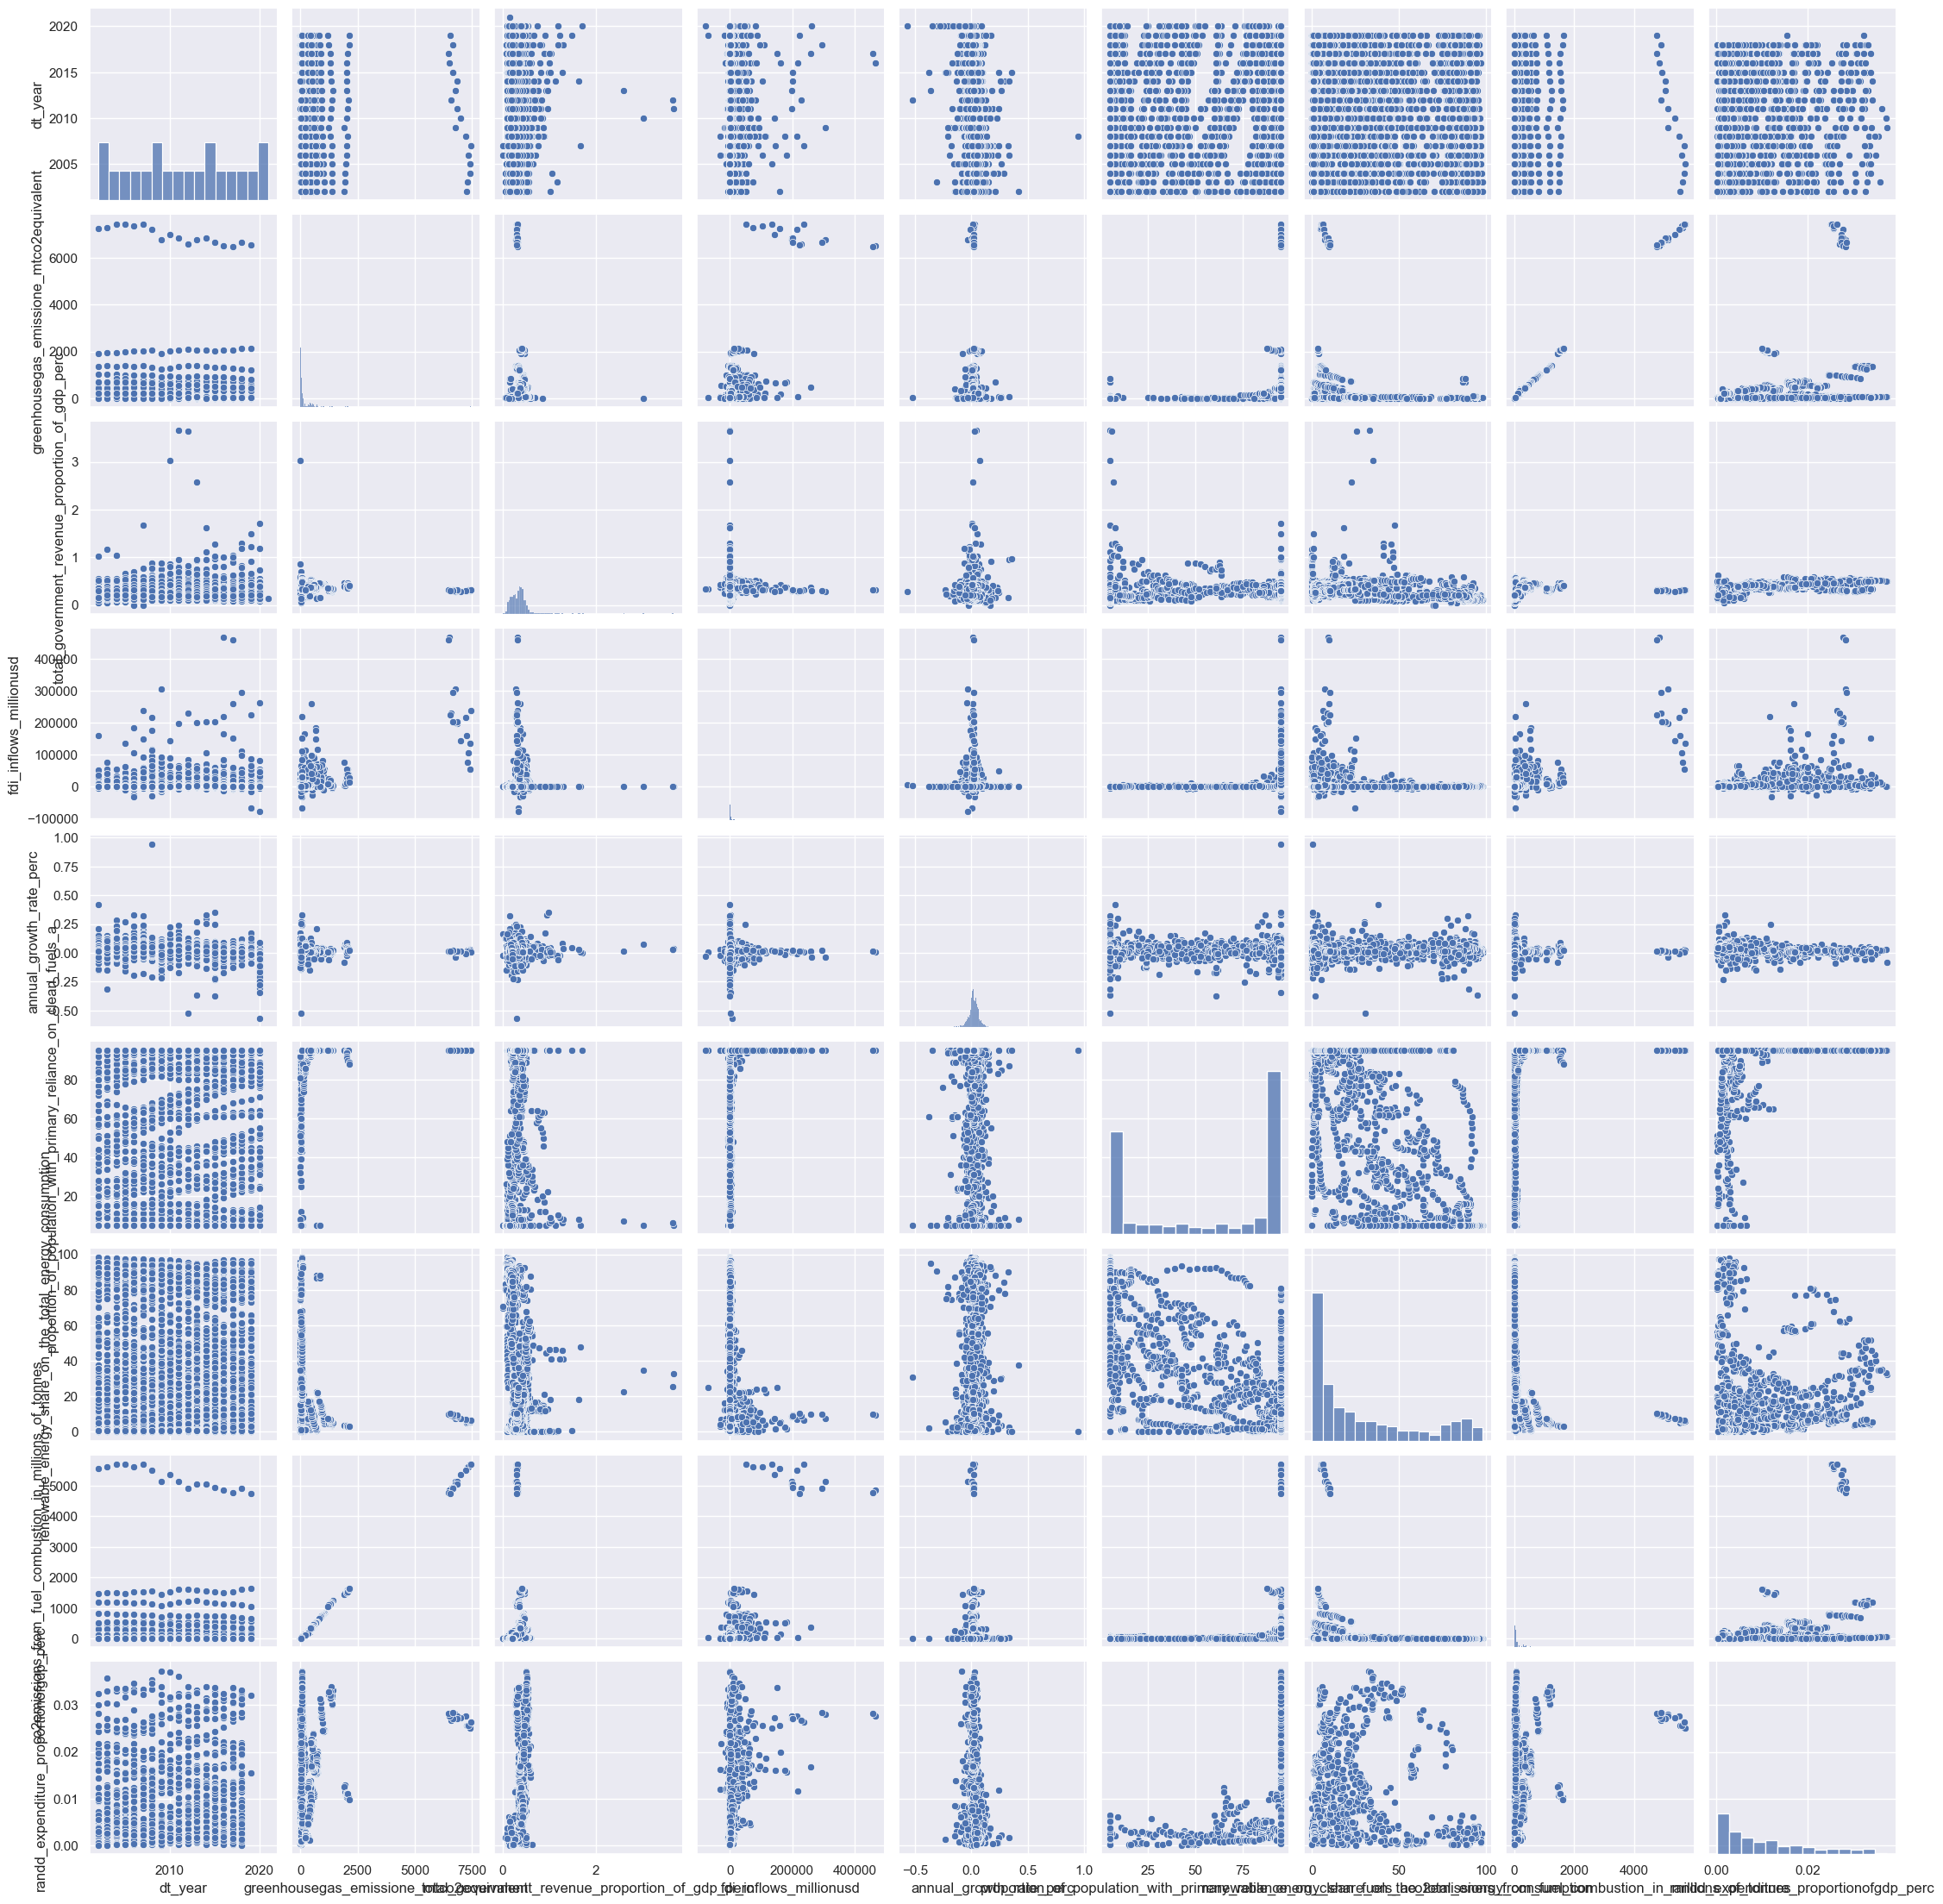

In [102]:
import matplotlib.pyplot as plt
# sns.pairplot(df, height=2.5);
# sns.scatterplot(x='greenhousegas_emissione_mtco2equivalent', y="fdi_inflows_millionusd", data=df)
# sns.boxplot(df['greenhousegas_emissione_mtco2equivalent'])

# Position of the Outlier
# np.where(df['greenhousegas_emissione_mtco2equivalent']>1000)


outlierRemovalUsingBoxPlot(df,'greenhousegas_emissione_mtco2equivalent')
outlierRemovalUsingBoxPlot(df,'fdi_inflows_millionusd')
# df=df[df['greenhousegas_emissione_mtco2equivalent']<6000]

# sns.scatterplot(x='greenhousegas_emissione_mtco2equivalent', y="fdi_inflows_millionusd", data=df)
# sns.lmplot(x="greenhousegas_emissione_mtco2equivalent", y="fdi_inflows_millionusd", data=df)

# sns.set(rc={'figure.figsize':(15,5)})
# ax=sns.boxplot(x='greenhousegas_emissione_mtco2equivalent', y='fdi_inflows_millionusd', data=df)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

# ax=sns.swarmplot(x='greenhousegas_emissione_mtco2equivalent', y='fdi_inflows_millionusd', data=df)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

sns.pairplot(df, height=2.5);
plt.savefig('masterDF.png')

# df.shape
